<p> Dataset: https://www.kaggle.com/datasets/shivamb/netflix-shows  <br>

This dataset is about Movies and TV Shows released by Netflix over time and its pieces of information like directors, cast, released country, category, etc. <br>

With this dataset, I'm going to do Predictive Analytics to predict the categories of the certain Movies or TV Shows from their description which is about 150 characters describing the Movies or TV Shows content, and do Prescriptive Analytics to recommend the top 10 Movies and TV Shows most similar with the chosen Movies and TV Shows. </p>


# Predictive Analytics

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("https://gist.githubusercontent.com/loodinon/cf49e0531786394830d18f703427dc0a/raw/140013845f4aba95e0cc6898214cfff6423570c4/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Aforementioned, this part concentrates on several columns consisting of title, listed_in, and description, and those three columns do not have any null values. <br>

So I'm going to jump into the next part.

## Data Preprocessing

In [5]:
# Create a new table with 0, and 1 values (0 represents no, and 1 represents yes about that Movies/TV Shows having this column's name category)
df2 = pd.DataFrame(index = df.index)
for idx, cats in enumerate(df["listed_in"]):
    for cat in cats.split(", "):
        df2.loc[idx,cat] = 1
df2.fillna(0,inplace = True)
df2

,Documentaries,International TV Shows,TV Dramas,TV Mysteries,Crime TV Shows,TV Action & Adventure,Docuseries,Reality TV,Romantic TV Shows,TV Comedies,...,Science & Nature TV,Teen TV Shows,Cult Movies,TV Shows,Faith & Spirituality,LGBTQ Movies,Stand-Up Comedy,Movies,Stand-Up Comedy & Talk Shows,Classic & Cult TV
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Count the number of titles with each number of categories per title
num_of_cats_per_title = df2.sum(axis=1).value_counts().sort_index()
num_of_cats_per_title

1.0    2020
2.0    3058
3.0    3729
dtype: int64

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


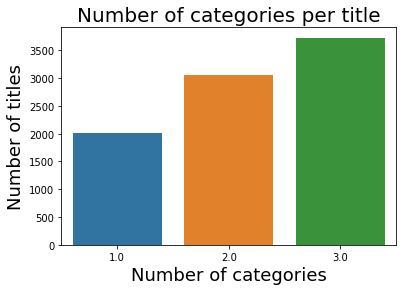

In [7]:
# Visualize that table
sns.barplot(num_of_cats_per_title.index, num_of_cats_per_title.values)
plt.title("Number of categories per title", fontsize=20)
plt.ylabel('Number of titles', fontsize=18)
plt.xlabel('Number of categories', fontsize=18)
plt.show()

In [8]:
description_category = pd.concat([df[['title','description']], df2], axis=1)
description_category.head()

,title,description,Documentaries,International TV Shows,TV Dramas,TV Mysteries,Crime TV Shows,TV Action & Adventure,Docuseries,Reality TV,...,Science & Nature TV,Teen TV Shows,Cult Movies,TV Shows,Faith & Spirituality,LGBTQ Movies,Stand-Up Comedy,Movies,Stand-Up Comedy & Talk Shows,Classic & Cult TV
0,Dick Johnson Is Dead,"As her father nears the end of his life, filmm...",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Blood & Water,"After crossing paths at a party, a Cape Town t...",0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Ganglands,To protect his family from a powerful drug lor...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Jailbirds New Orleans,"Feuds, flirtations and toilet talk go down amo...",0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Kota Factory,In a city of coaching centers known to train I...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# Count the number of tiltes per category
cat_counter = df2.sum(axis=0).sort_values(ascending = False)
cat_counter.head()

International Movies      2752.0
Dramas                    2427.0
Comedies                  1674.0
International TV Shows    1351.0
Documentaries              869.0
dtype: float64

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


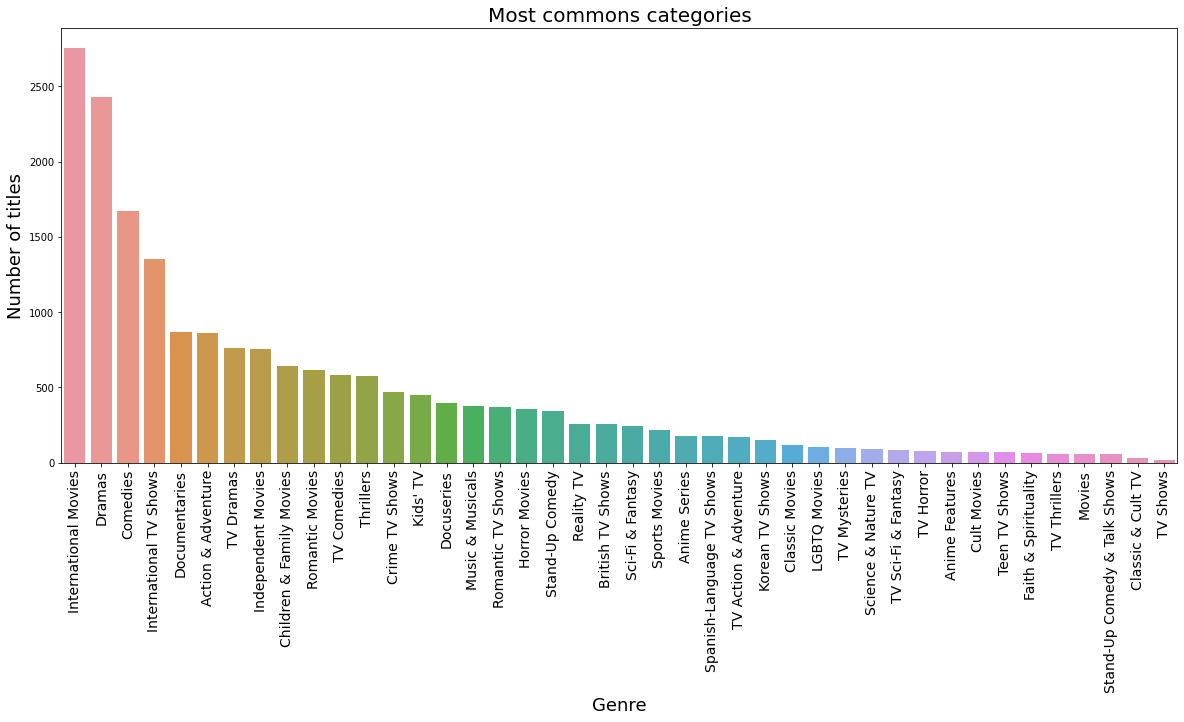

In [10]:
# Visualize that table
plt.figure(figsize=(20,8))

sns.barplot(cat_counter.index, cat_counter.values)
plt.title("Most commons categories", fontsize=20)
plt.ylabel('Number of titles', fontsize=18)
plt.xlabel('Genre', fontsize=18)
plt.xticks(fontsize = 14, rotation='vertical')

plt.show()

In [11]:
# Count the number of characters per Movies/TV Shows description
length_of_description = description_category.copy()
length_of_description['len'] = description_category["description"].apply(lambda x: len(x))
length_of_description.head()

,title,description,Documentaries,International TV Shows,TV Dramas,TV Mysteries,Crime TV Shows,TV Action & Adventure,Docuseries,Reality TV,...,Teen TV Shows,Cult Movies,TV Shows,Faith & Spirituality,LGBTQ Movies,Stand-Up Comedy,Movies,Stand-Up Comedy & Talk Shows,Classic & Cult TV,len
0,Dick Johnson Is Dead,"As her father nears the end of his life, filmm...",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,152
1,Blood & Water,"After crossing paths at a party, a Cape Town t...",0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,147
2,Ganglands,To protect his family from a powerful drug lor...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,146
3,Jailbirds New Orleans,"Feuds, flirtations and toilet talk go down amo...",0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,147
4,Kota Factory,In a city of coaching centers known to train I...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,152


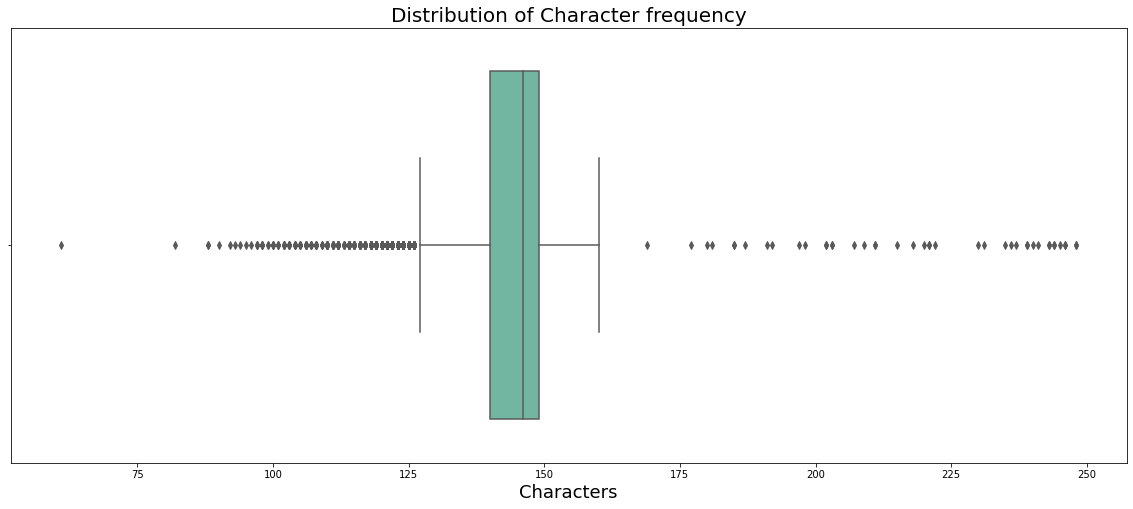

In [12]:
# Visualize the Distribution of Character frequency through a boxplot
plt.figure(figsize=(20, 8))

ax = sns.boxplot(x='len', data=length_of_description, orient="h", palette="Set2")
plt.ylabel('')
plt.xlabel('Characters', fontsize = 18)
plt.title("Distribution of Character frequency", fontsize=20)
plt.show()

## Natural Language Processing <br>

Data preprocessing involves preparing and "cleaning" text data for machines to be able to analyze it. <br>

Preprocessing puts data in workable form and highlights features in the text that an algorithm can work with. <br>

In my project, I'm going to do some NLP tasks to get the short form of Movies/TV Shows description.

In [13]:
import re # Regex is very important for this part
def decontract(sentence): # to decontract several words
    sentence = re.sub("won't", "will not", sentence)
    sentence = re.sub("can\'t", "can not", sentence)
    sentence = re.sub("n\'t", " not", sentence)
    sentence = re.sub("\'re", " are", sentence)
    sentence = re.sub("\'s", " is", sentence)
    sentence = re.sub("\'d", " would", sentence)
    sentence = re.sub("\'ll", " will", sentence)
    sentence = re.sub("\'t", " not", sentence)
    sentence = re.sub("\'ve", " have", sentence)
    sentence = re.sub("\'m", " am", sentence)
    return sentence

In [14]:
def cleanPunc(sentence): #clean punctuation
    cleaned = re.sub('[?|!|\'|"|#|.|,|;|)|(|\|/]','',sentence)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned

In [15]:
def keepAlpha(sentence): #only keep alphabet letters
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', '', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
nltk.download('stopwords') # to use the stopwords list in nltk packages

stopwords = set(stopwords.words('english'))

def removeStopWords(sentence): # remove stop words (common words which doesn't add much information)
    filtered_sentence = ""
    for word in sentence.split():
        if word not in stopwords:
            filtered_sentence += word
            filtered_sentence += " "
    filtered_sentence = filtered_sentence.strip()
    return filtered_sentence

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
stemmer = SnowballStemmer("english")
def stemming(sentence): #reducing the word to its word stem
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

In [18]:
def applyNLPtasks(description): 
    description = stemming(
                removeStopWords(
                    keepAlpha(
                        cleanPunc(
                            decontract(description.lower())))))
    return description

In [19]:
description_category['description'] = description_category['description'].apply(applyNLPtasks)
description_category.head()

,title,description,Documentaries,International TV Shows,TV Dramas,TV Mysteries,Crime TV Shows,TV Action & Adventure,Docuseries,Reality TV,...,Science & Nature TV,Teen TV Shows,Cult Movies,TV Shows,Faith & Spirituality,LGBTQ Movies,Stand-Up Comedy,Movies,Stand-Up Comedy & Talk Shows,Classic & Cult TV
0,Dick Johnson Is Dead,father near end life filmmak kirsten johnson s...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Blood & Water,cross path parti cape town teen set prove whet...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Ganglands,protect famili power drug lord skill thief meh...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Jailbirds New Orleans,feud flirtat toilet talk go among incarcer wom...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Kota Factory,citi coach center known train india finest col...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


After applying those NLP tasks, the descriptions was being shorted that can be analyzed. <br>

In the following part, I try to find the Distribution of Character frequency of the short form of descriptions to track the differences between the description after applying NLP tasks and the original.

In [20]:
length_of_description2 = description_category.copy()
length_of_description2['len'] = description_category["description"].apply(lambda x: len(x))
length_of_description2.head()

,title,description,Documentaries,International TV Shows,TV Dramas,TV Mysteries,Crime TV Shows,TV Action & Adventure,Docuseries,Reality TV,...,Teen TV Shows,Cult Movies,TV Shows,Faith & Spirituality,LGBTQ Movies,Stand-Up Comedy,Movies,Stand-Up Comedy & Talk Shows,Classic & Cult TV,len
0,Dick Johnson Is Dead,father near end life filmmak kirsten johnson s...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90
1,Blood & Water,cross path parti cape town teen set prove whet...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93
2,Ganglands,protect famili power drug lord skill thief meh...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94
3,Jailbirds New Orleans,feud flirtat toilet talk go among incarcer wom...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100
4,Kota Factory,citi coach center known train india finest col...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105


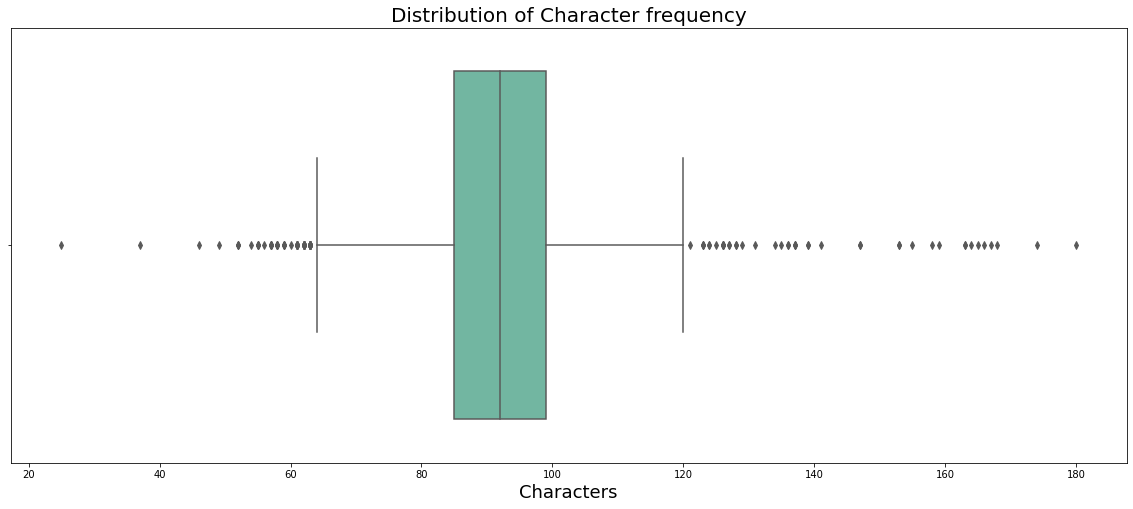

In [21]:
plt.figure(figsize=(20, 8))

ax = sns.boxplot(x='len', data=length_of_description2, orient="h", palette="Set2")
plt.ylabel('')
plt.xlabel('Characters', fontsize = 18)
plt.title("Distribution of Character frequency", fontsize=20)
plt.show()

## Classification

### Split the dataset into training sets and test sets

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X = description_category['description']
y = description_category[description_category.columns[2:]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8, shuffle = True)

After the splitting, I'm going to vectorize the descriptions using Term Frequency-Inverse Document Frequency (TF-IDF) method. <br>

TF-IDF is one of the most popular method to vectorize word data. It uses to compute the score for each term and document, down-weighted by the number of documents in which it occurs. This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

In [23]:
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In the Predictive Analytics I have to do, the problem is Classification, specifically is Multilabels Classification, which predicts one or more labels for each observation. <br>

There are several ways to deal with this problem. In this project, I use One-vs-Rest method for using Binary Classification algorithms for Multilabels Classification, that means treating each column and the rest as the two options of Binary Classification, then execute like Binary Classification.

In [24]:
# Import several module needed
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.multiclass import OneVsRestClassifier

I use three model including Logistic Regression, Naive Bayes, and Linear SVM to be classifier, then evaluate the performance of each model through AUC ROC score, Accuracy by Hamming Score, Exact Match Ratio, Hamming Loss, Precision, Recall, and F1 Score.

### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

result_df = pd.DataFrame(index = ["Avg AUC ROC Scores", "Avg Accuracy Scores", "Avg Exact Match Ratio", "Avg Hamming Loss", "Avg Precision Score", "Avg Recall Score", "Avg F1 Score"])

LR_pipeline = Pipeline([('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1))])

dfLR = pd.DataFrame(columns = description_category.columns[2:])
accuracy = 0
auc_roc = 0
for category in description_category.columns[2:]:
    LR_pipeline.fit(X_train, y_train[category])

    prediction = LR_pipeline.predict(X_test)

    dfLR[category] = prediction
    accuracy += accuracy_score(y_test[category], prediction)
    auc_roc += roc_auc_score(y_test[category], prediction)

result_df["Logistic Regresssion"] = [auc_roc/len(description_category.columns[2:]), 
                                    accuracy/len(description_category.columns[2:]), 
                                    accuracy_score(y_test, dfLR, normalize=True, sample_weight=None),
                                    hamming_loss(y_test, dfLR),
                                    precision_score(y_true=y_test, y_pred=dfLR, average='samples'),
                                    recall_score(y_true=y_test, y_pred=dfLR, average='samples'),
                                    f1_score(y_true=y_test, y_pred=dfLR, average='samples')]

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The predicted result are shown in the dataframe dfLR

In [26]:
dfLR

,Documentaries,International TV Shows,TV Dramas,TV Mysteries,Crime TV Shows,TV Action & Adventure,Docuseries,Reality TV,Romantic TV Shows,TV Comedies,...,Science & Nature TV,Teen TV Shows,Cult Movies,TV Shows,Faith & Spirituality,LGBTQ Movies,Stand-Up Comedy,Movies,Stand-Up Comedy & Talk Shows,Classic & Cult TV
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
dfLR.sum(axis = 1).value_counts().sort_index()

0.0    1487
1.0     174
2.0      99
3.0       2
dtype: int64

### Naive Bayes

In [28]:
from sklearn.naive_bayes import MultinomialNB

NB_pipeline = Pipeline([('clf', OneVsRestClassifier(MultinomialNB(fit_prior=True, class_prior=None)))])

dfNB = pd.DataFrame(columns = description_category.columns[2:])
accuracy = 0
auc_roc = 0
for category in description_category.columns[2:]:
    NB_pipeline.fit(X_train, y_train[category])
    
    prediction = NB_pipeline.predict(X_test)
    
    dfNB[category] = prediction
    accuracy += accuracy_score(y_test[category], prediction)
    auc_roc += roc_auc_score(y_test[category],prediction)

result_df["Naive Bayes"] = [auc_roc/len(description_category.columns[2:]), 
                            accuracy/len(description_category.columns[2:]), 
                            accuracy_score(y_test, dfNB, normalize=True, sample_weight=None),
                            hamming_loss(y_test, dfNB),
                            precision_score(y_true=y_test, y_pred=dfNB, average='samples'),
                            recall_score(y_true=y_test, y_pred=dfNB, average='samples'),
                            f1_score(y_true=y_test, y_pred=dfNB, average='samples')]

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The predicted result are shown in the dataframe dfNB

In [29]:
dfNB

,Documentaries,International TV Shows,TV Dramas,TV Mysteries,Crime TV Shows,TV Action & Adventure,Docuseries,Reality TV,Romantic TV Shows,TV Comedies,...,Science & Nature TV,Teen TV Shows,Cult Movies,TV Shows,Faith & Spirituality,LGBTQ Movies,Stand-Up Comedy,Movies,Stand-Up Comedy & Talk Shows,Classic & Cult TV
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
dfNB.sum(axis = 1).value_counts().sort_index()

0.0    1757
1.0       2
2.0       3
dtype: int64

### Linear SVM

In [31]:
from sklearn.svm import LinearSVC

SVC_pipeline = Pipeline([('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1))])

dfSVC = pd.DataFrame(columns = description_category.columns[2:])
accuracy = 0
auc_roc = 0
for category in description_category.columns[2:]:
    SVC_pipeline.fit(X_train, y_train[category])
    
    prediction = SVC_pipeline.predict(X_test)

    dfSVC[category] = prediction
    accuracy += accuracy_score(y_test[category], prediction)
    auc_roc += roc_auc_score(y_test[category],prediction)

result_df["Linear SVM"] = [auc_roc/len(description_category.columns[2:]), 
                            accuracy/len(description_category.columns[2:]), 
                            accuracy_score(y_test, dfSVC, normalize=True, sample_weight=None),
                            hamming_loss(y_test, dfSVC),
                            precision_score(y_true=y_test, y_pred=dfSVC, average='samples'),
                            recall_score(y_true=y_test, y_pred=dfSVC, average='samples'),
                            f1_score(y_true=y_test, y_pred=dfSVC, average='samples')]

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The predicted result are shown in the dataframe dfSVC

In [32]:
dfSVC

,Documentaries,International TV Shows,TV Dramas,TV Mysteries,Crime TV Shows,TV Action & Adventure,Docuseries,Reality TV,Romantic TV Shows,TV Comedies,...,Science & Nature TV,Teen TV Shows,Cult Movies,TV Shows,Faith & Spirituality,LGBTQ Movies,Stand-Up Comedy,Movies,Stand-Up Comedy & Talk Shows,Classic & Cult TV
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
dfSVC.sum(axis = 1).value_counts().sort_index()

0.0    699
1.0    622
2.0    335
3.0     88
4.0     17
6.0      1
dtype: int64

## Compare Model Performances

In [34]:
result_df

,Logistic Regresssion,Naive Bayes,Linear SVM
Avg AUC ROC Scores,0.507304,0.500176,0.561959
Avg Accuracy Scores,0.949246,0.947408,0.953273
Avg Exact Match Ratio,0.020999,0.000000,0.123156
Avg Hamming Loss,0.050754,0.052592,0.046727
Avg Precision Score,0.108116,0.002838,0.391411
Avg Recall Score,0.066402,0.001513,0.288593
Avg F1 Score,0.078982,0.001930,0.316641


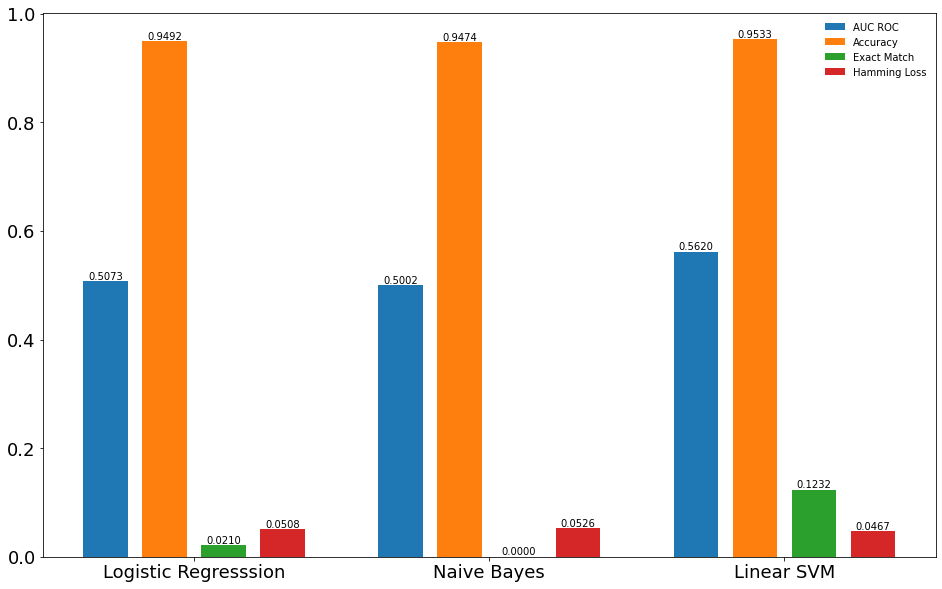

In [35]:
x = result_df.columns
auc_roc = result_df.iloc[0,:]
accuracy = result_df.iloc[1,:]
exact_match = result_df.iloc[2,:]
hamming_loss = result_df.iloc[3,:]
  
x_axis = np.arange(len(x))

plt.figure(figsize=(16,10))

for i in x_axis:
    plt.text(i - 0.3, auc_roc[i], "{:.4f}".format(auc_roc[i]), ha = "center", va = "bottom")
    plt.text(i - 0.1, accuracy[i], "{:.4f}".format(accuracy[i]), ha = "center", va = "bottom")
    plt.text(i + 0.1, exact_match[i], "{:.4f}".format(exact_match[i]), ha = "center", va = "bottom")
    plt.text(i + 0.3, hamming_loss[i], "{:.4f}".format(hamming_loss[i]), ha = "center", va = "bottom")
  
plt.bar(x_axis - 0.3, auc_roc, 0.15, label = "AUC ROC")
plt.bar(x_axis - 0.1, accuracy, 0.15, label = 'Accuracy')
plt.bar(x_axis + 0.1, exact_match, 0.15, label = 'Exact Match')
plt.bar(x_axis + 0.3, hamming_loss, 0.15, label = 'Hamming Loss')

plt.xticks(x_axis, x, fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(frameon=False, loc='upper right', ncol=1)
plt.show()

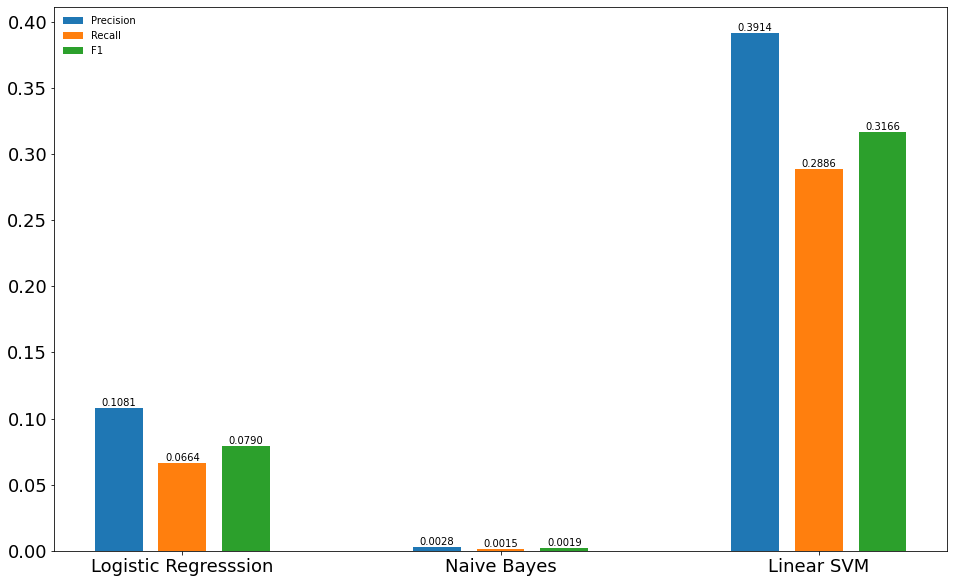

In [36]:
x = result_df.columns
precision = result_df.iloc[4,:]
recall = result_df.iloc[5,:]
f1 = result_df.iloc[6,:]
  
x_axis = np.arange(len(x))

plt.figure(figsize=(16,10))

for i in x_axis:
    plt.text(i - 0.2, precision[i], "{:.4f}".format(precision[i]), ha = "center", va = "bottom")
    plt.text(i, recall[i], "{:.4f}".format(recall[i]), ha = "center", va = "bottom")
    plt.text(i + 0.2, f1[i], "{:.4f}".format(f1[i]), ha = "center", va = "bottom")
  
plt.bar(x_axis - 0.2, precision, 0.15, label = "Precision")
plt.bar(x_axis, recall, 0.15, label = 'Recall')
plt.bar(x_axis + 0.2, f1, 0.15, label = 'F1')
  
plt.xticks(x_axis, x, fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(frameon=False, loc='upper left', ncol=1)
plt.show()

# Prescriptive Analytics

In Prescriptive Analytics, I'm going to recommend the top 10 Movies/TV Shows most similar with the chosen one. <br>

To get the similarity between two Movies/TV Shows, I use Cosine Similarity on the soup, which is the result of the combination of values in 5 columns including tilte, director, cast, listed_in, and description after applying NLP tasks on that combination.

## Data Preprocessing

In [37]:
df = pd.read_csv("https://gist.githubusercontent.com/loodinon/cf49e0531786394830d18f703427dc0a/raw/140013845f4aba95e0cc6898214cfff6423570c4/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [38]:
df_for_soup = df[['title', 'director', 'cast', 'listed_in', 'description']]
df_for_soup = df_for_soup.fillna("")
df_for_soup.head()

,title,director,cast,listed_in,description
0,Dick Johnson Is Dead,Kirsten Johnson,,Documentaries,"As her father nears the end of his life, filmm..."
1,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...","Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,Jailbirds New Orleans,,,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...","International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [39]:
def create_soup(x):
    return x['title']+ ' '+ x['director']+ ' '+ x['cast']+ ' ' + x['listed_in']+ ' ' +x['description']

In [40]:
df_for_soup['soup'] = df_for_soup.apply(create_soup, axis=1)
for i in range(4,1,-1):
    df_for_soup["soup"].replace(i*" ", " ", inplace=True, regex = True)

In [41]:
df_for_soup['soup'] = df_for_soup['soup'].apply(applyNLPtasks)

In [42]:
df_for_soup = df_for_soup[["title", "soup"]]
df_for_soup.head()

,title,soup
0,Dick Johnson Is Dead,dick johnson dead kirsten johnson documentari ...
1,Blood & Water,blood water ama qamata khosi ngema gail mabala...
2,Ganglands,gangland julien leclercq sami bouajila traci g...
3,Jailbirds New Orleans,jailbird new orlean docuseri realiti tv feud f...
4,Kota Factory,kota factori mayur jitendra kumar ranjan raj a...


## Recommendation

In [43]:
from sklearn.metrics.pairwise import cosine_similarity

count_matrix = vectorizer.fit_transform(df_for_soup['soup'])
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [44]:
df_cosinesim = pd.DataFrame(cosine_sim)
df_cosinesim

,0,1,2,3,4,5,6,7,8,9,...,8797,8798,8799,8800,8801,8802,8803,8804,8805,8806
0,1.000000,0.000000,0.004130,0.000000,0.001911,0.000000,0.000000,0.000000,0.003983,0.005315,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001867,0.007342
1,0.000000,1.000000,0.009982,0.001825,0.010777,0.015614,0.002869,0.000681,0.005296,0.000376,...,0.005084,0.000651,0.006976,0.013292,0.000752,0.000366,0.014618,0.002641,0.000000,0.000707
2,0.004130,0.009982,1.000000,0.002266,0.016521,0.004221,0.005815,0.000367,0.009174,0.000000,...,0.001836,0.000351,0.000387,0.015974,0.000405,0.001525,0.016237,0.002543,0.000998,0.001425
3,0.000000,0.001825,0.002266,1.000000,0.008751,0.001940,0.003684,0.000000,0.012421,0.000000,...,0.000843,0.000000,0.000000,0.002365,0.000000,0.000000,0.003608,0.000000,0.004042,0.000000
4,0.001911,0.010777,0.016521,0.008751,1.000000,0.004557,0.000000,0.000396,0.009904,0.002016,...,0.001982,0.003846,0.000418,0.032760,0.005763,0.000000,0.024801,0.003604,0.005758,0.003530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,0.000000,0.000366,0.001525,0.000000,0.000000,0.000389,0.002368,0.001145,0.000000,0.000470,...,0.000000,0.003894,0.004301,0.000474,0.004323,1.000000,0.000000,0.005207,0.004952,0.000845
8803,0.000000,0.014618,0.016237,0.003608,0.024801,0.012097,0.002093,0.000000,0.010469,0.000899,...,0.008815,0.000881,0.000000,0.016949,0.000000,0.000000,1.000000,0.020550,0.003211,0.000000
8804,0.000000,0.002641,0.002543,0.000000,0.003604,0.001750,0.000342,0.000756,0.000000,0.005829,...,0.000000,0.000997,0.000399,0.003666,0.000417,0.005207,0.020550,1.000000,0.009478,0.000393
8805,0.001867,0.000000,0.000998,0.004042,0.005758,0.003708,0.009939,0.000693,0.000000,0.004454,...,0.001640,0.000915,0.000366,0.000000,0.000383,0.004952,0.003211,0.009478,1.000000,0.001461


In [45]:
indices = pd.Series(df_for_soup.index, index=df_for_soup['title'])
indices

title
Dick Johnson Is Dead        0
Blood & Water               1
Ganglands                   2
Jailbirds New Orleans       3
Kota Factory                4
                         ... 
Zodiac                   8802
Zombie Dumb              8803
Zombieland               8804
Zoom                     8805
Zubaan                   8806
Length: 8807, dtype: int64

To get the top 10 Movies/TV Shows most similar with the chosen Movies/TV Shows, I pick the top 11 excluding the top 1 with highest cosine similarity (because the top 1 definitely is this chosen Movies/TV Shows with cosine similarity equals to 1).

In [46]:
def get_recommendation(title):
    idx = indices[title]
    sim_scores = df_cosinesim[idx].sort_values(ascending=False).reset_index()[1:11]["index"]
    return df['title'].iloc[sim_scores]

In [47]:
get_recommendation('Breaking Bad')

2931                       Better Call Saul
3428        El Camino: A Breaking Bad Movie
5606                       Girlfriend's Day
8505                               The Show
1477                                Dare Me
6817                       Furthest Witness
3684                              Kakegurui
1955                 The School Nurse Files
3744                                Unit 42
678     The Assassination of Gianni Versace
Name: title, dtype: object

In [48]:
get_recommendation("Shutter Island")

8802               Zodiac
8272         The Departed
6826    Gangs of New York
6272     Before the Flood
8312          The Founder
3966       The Highwaymen
6886              Gothika
3391          The Command
8053         Solomon Kane
2860                 Hugo
Name: title, dtype: object

In [49]:
get_recommendation("Zodiac")

1358               Shutter Island
6886                      Gothika
8312                  The Founder
3966               The Highwaymen
6878    Good Night, and Good Luck
6200       Avengers: Infinity War
8003              Sherlock Holmes
8511           The Social Network
1612                         Chef
6147              American Psycho
Name: title, dtype: object